In [135]:
import numpy as np
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'La tension k(x)')

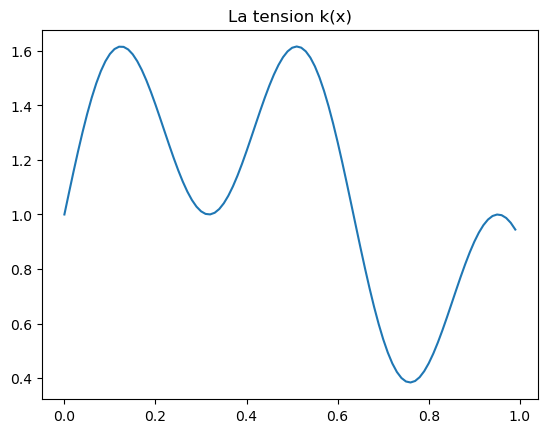

In [326]:
k = lambda t : 1+0.8*np.sin(10*t)*np.cos(5*t)
p = lambda t : -lamda*np.exp(-(lamda*(t))**2)
pp=lambda t  : 2*((lamda)**2)*t*p(t) 
lamda=20
N=100
h=1/(N+1)
plt.plot([i/100 for i in range (N)], [k(i*h) for i in range (N)] )
plt.title('La tension k(x)')

In [273]:
h=1/(N+1)
diago  =[(k((i+1/2)*h)+k((i-1/2)*h))/h**2 for i in range (1,N+1)]
sdiag  =[-k((i+1/2)*h)/h**2 for i in range (1,N)]
ssdiag =[-k((i-1/2)*h)/h**2 for i in range (2,N+1)]
K=np.diag(diago)+np.diag(sdiag,1)+np.diag(ssdiag,-1)

def position(a):
    F=[p(i*h-a) for i in range (1,N+1)]
    U=np.linalg.solve(K,F)
    return U

def Rprime(a):
    F=[pp(i*h-a) for i in range (1,N+1)]
    V=np.linalg.solve(K,F)
    u=position(a)
    r=(k(h/2)/h)**2*u[0]*V[0]+(k(100.5*h)/h)**2*u[-1]*V[-1]
    return r
    
def enRupture(a):
    u=position(a)
    return ((k(h/2)*u[0]/h)**2+(k((N+.5)*h)*u[-1]/h)**2)/2
    
    
def grad():
    a0=0.5
    rho=0.09
    err=abs(Rprime(a0))
    iter=0
    while err>= 1e-6:
        a=a0-rho*Rprime(a0)
        err=abs(Rprime(a))
        a0=a
        iter+=1
    return a0,iter

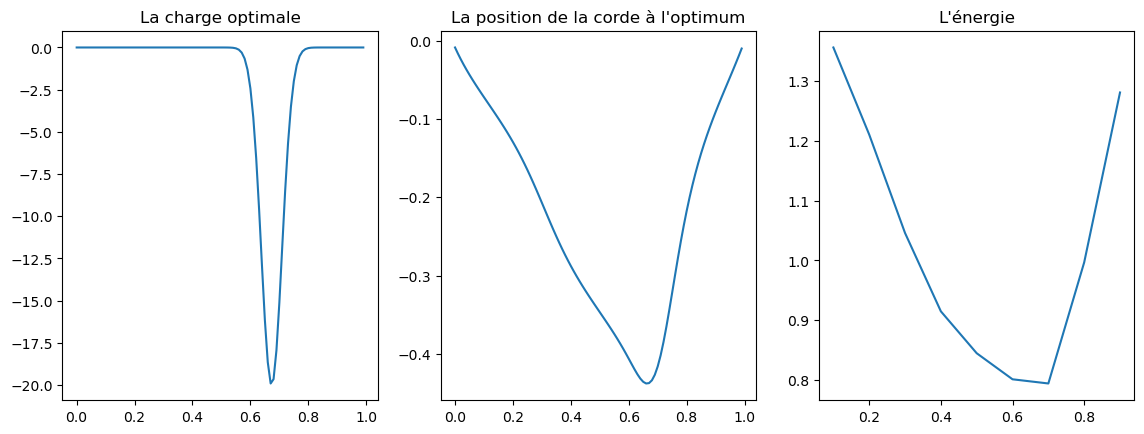

In [325]:
plt.subplot(131)
plt.plot([i/100 for i in range (N)], [p(i*h-grad()[0]) for i in range (N)] )
plt.title('La charge optimale')
plt.subplot(132)
plt.plot([i/100 for i in range (N)], position(grad()[0]) )
plt.title('La position de la corde à l\'optimum')
plt.subplot(133)
plt.plot([i/10 for i in range (1,10)], [enRupture(i*0.1) for i in range (1,10)])
plt.title('L\'énergie')
plt.subplots_adjust(right=1.8,wspace=0.2)
plt.show()